In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SVM-PCA-SOUTH-AFRICA/african_crises.csv")
df.head() # show first 5 rows of dataset

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# make a function where we can see the different statistics of dataset
def dataset_statistics(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    print(f"Column names: {column_names}\n")
    print("Data types:")
    print(data_types)

In [ ]:
# check the statistics of dataset
dataset_statistics(df)

Total rows: 1059

Total columns: 14

Column names: ['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']

Data types:
int64      8
object     3
float64    3
Name: count, dtype: int64


In [ ]:
# lets ensure data types match
data_types = df.dtypes.to_frame().rename(columns={0:'dtypes'})
print(tabulate(data_types, headers = 'keys', tablefmt = 'psql'))

+---------------------------------+----------+
|                                 | dtypes   |
|---------------------------------+----------|
| case                            | int64    |
| cc3                             | object   |
| country                         | object   |
| year                            | int64    |
| systemic_crisis                 | int64    |
| exch_usd                        | float64  |
| domestic_debt_in_default        | int64    |
| sovereign_external_debt_default | int64    |
| gdp_weighted_default            | float64  |
| inflation_annual_cpi            | float64  |
| independence                    | int64    |
| currency_crises                 | int64    |
| inflation_crises                | int64    |
| banking_crisis                  | object   |
+---------------------------------+----------+


In [ ]:
def check_unique_values(df):
  # Calculate the count of unique values for each column
  unique_value_counts = df.nunique()
  unique_counts_df = pd.DataFrame({'Column': unique_value_counts.index, 'Unique Count': unique_value_counts.values})
  print(tabulate(unique_counts_df, headers = 'keys', tablefmt = 'psql'))

In [ ]:
# Calculate the count of unique values for each column
check_unique_values(df)

+----+---------------------------------+----------------+
|    | Column                          |   Unique Count |
|----+---------------------------------+----------------|
|  0 | case                            |             13 |
|  1 | cc3                             |             13 |
|  2 | country                         |             13 |
|  3 | year                            |            155 |
|  4 | systemic_crisis                 |              2 |
|  5 | exch_usd                        |            772 |
|  6 | domestic_debt_in_default        |              2 |
|  7 | sovereign_external_debt_default |              2 |
|  8 | gdp_weighted_default            |              6 |
|  9 | inflation_annual_cpi            |           1022 |
| 10 | independence                    |              2 |
| 11 | currency_crises                 |              3 |
| 12 | inflation_crises                |              2 |
| 13 | banking_crisis                  |              2 |
+----+--------

In [ ]:
# lets Check for and address any inconsistent values in categorical columns.
def check_categorical_unique_values(categorical_columns):
    for col in categorical_columns:
        unique_values = df[col].unique()
        value_counts = df[col].value_counts()
        print(f">> Unique values in column '{col}':")
        for value in unique_values:
            count = value_counts.get(value, 0)
            print(f"\t| {value}: {count} occurrences")

categorical_columns = df.select_dtypes(include=['object']).columns
check_categorical_unique_values(categorical_columns)

>> Unique values in column 'cc3':
	| DZA: 85 occurrences
	| AGO: 77 occurrences
	| CAF: 58 occurrences
	| CIV: 63 occurrences
	| EGY: 155 occurrences
	| KEN: 67 occurrences
	| MUS: 68 occurrences
	| MAR: 75 occurrences
	| NGA: 60 occurrences
	| ZAF: 114 occurrences
	| TUN: 75 occurrences
	| ZMB: 72 occurrences
	| ZWE: 90 occurrences
>> Unique values in column 'country':
	| Algeria: 85 occurrences
	| Angola: 77 occurrences
	| Central African Republic: 58 occurrences
	| Ivory Coast: 63 occurrences
	| Egypt: 155 occurrences
	| Kenya: 67 occurrences
	| Mauritius: 68 occurrences
	| Morocco: 75 occurrences
	| Nigeria: 60 occurrences
	| South Africa: 114 occurrences
	| Tunisia: 75 occurrences
	| Zambia: 72 occurrences
	| Zimbabwe: 90 occurrences
>> Unique values in column 'banking_crisis':
	| crisis: 94 occurrences
	| no_crisis: 965 occurrences


In [ ]:
save_results = "/content/drive/MyDrive/SVM-PCA-SOUTH-AFRICA"

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    c = ['green', 'red']
    ax = df_final[col].value_counts().plot(kind = 'bar', color = c)

    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = c,
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.savefig(f"{save_results}/binary_target_distribution.png", bbox_inches='tight')
    plt.show()

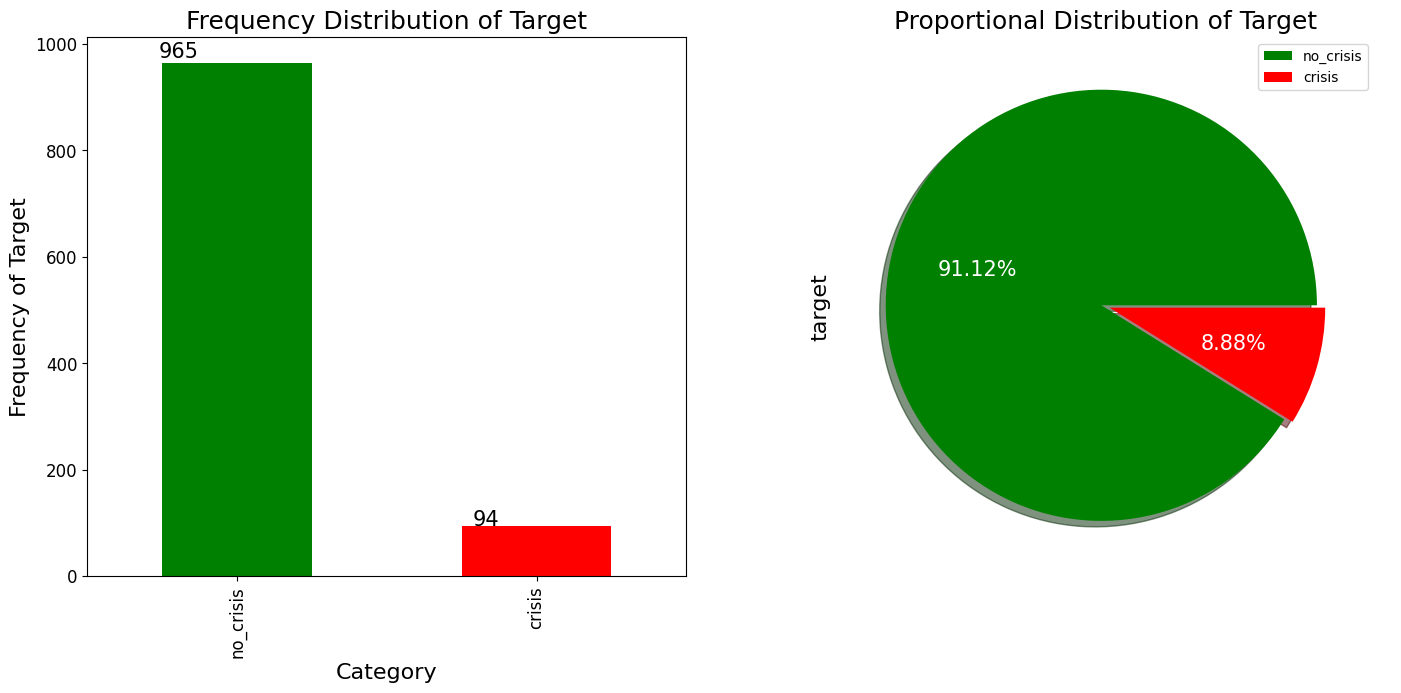

In [ ]:
target_distribution(df, "banking_crisis")

### The dataset exhibits a noticeable class imbalance, with 91.12% of samples classified as "no_crisis" and only 8.88% as "crisis." This imbalance can skew the model's predictions toward the majority class. To evaluate model performance in such scenarios, metrics like Precision, Recall, F1-Score, and the Area Under the Precision-Recall Curve (AUC-PR) are particularly useful, as they provide a more balanced assessment of the model's ability to correctly identify the minority class.

In [ ]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
def get_overall_info_about_dataset(df):
    '''
    lets try to check the percentage of missing values,unique values,percentage of one catagory values
    and type against each column.
    '''
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
    print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

get_overall_info_about_dataset(df)

+----+---------------------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature                         |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+---------------------------------+-----------------+-------------------+------------------------------+---------|
|  0 | case                            |              13 |                 0 |                     14.6364  | int64   |
|  1 | cc3                             |              13 |                 0 |                     14.6364  | object  |
|  2 | country                         |              13 |                 0 |                     14.6364  | object  |
|  3 | year                            |             155 |                 0 |                      1.22757 | int64   |
|  4 | systemic_crisis                 |               2 |                 0 |                     92.2568  | int64   |
|  5 | exch_usd                        |

In [ ]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric
'''
whicheve feature has more than 10 category appending on mumeric_featrues and remaining are appending in categoric_features
'''

for col in df.columns:
  if df[col].nunique()>10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['case', 'cc3', 'country', 'year', 'exch_usd', 'inflation_annual_cpi']
category feature : ['systemic_crisis', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']


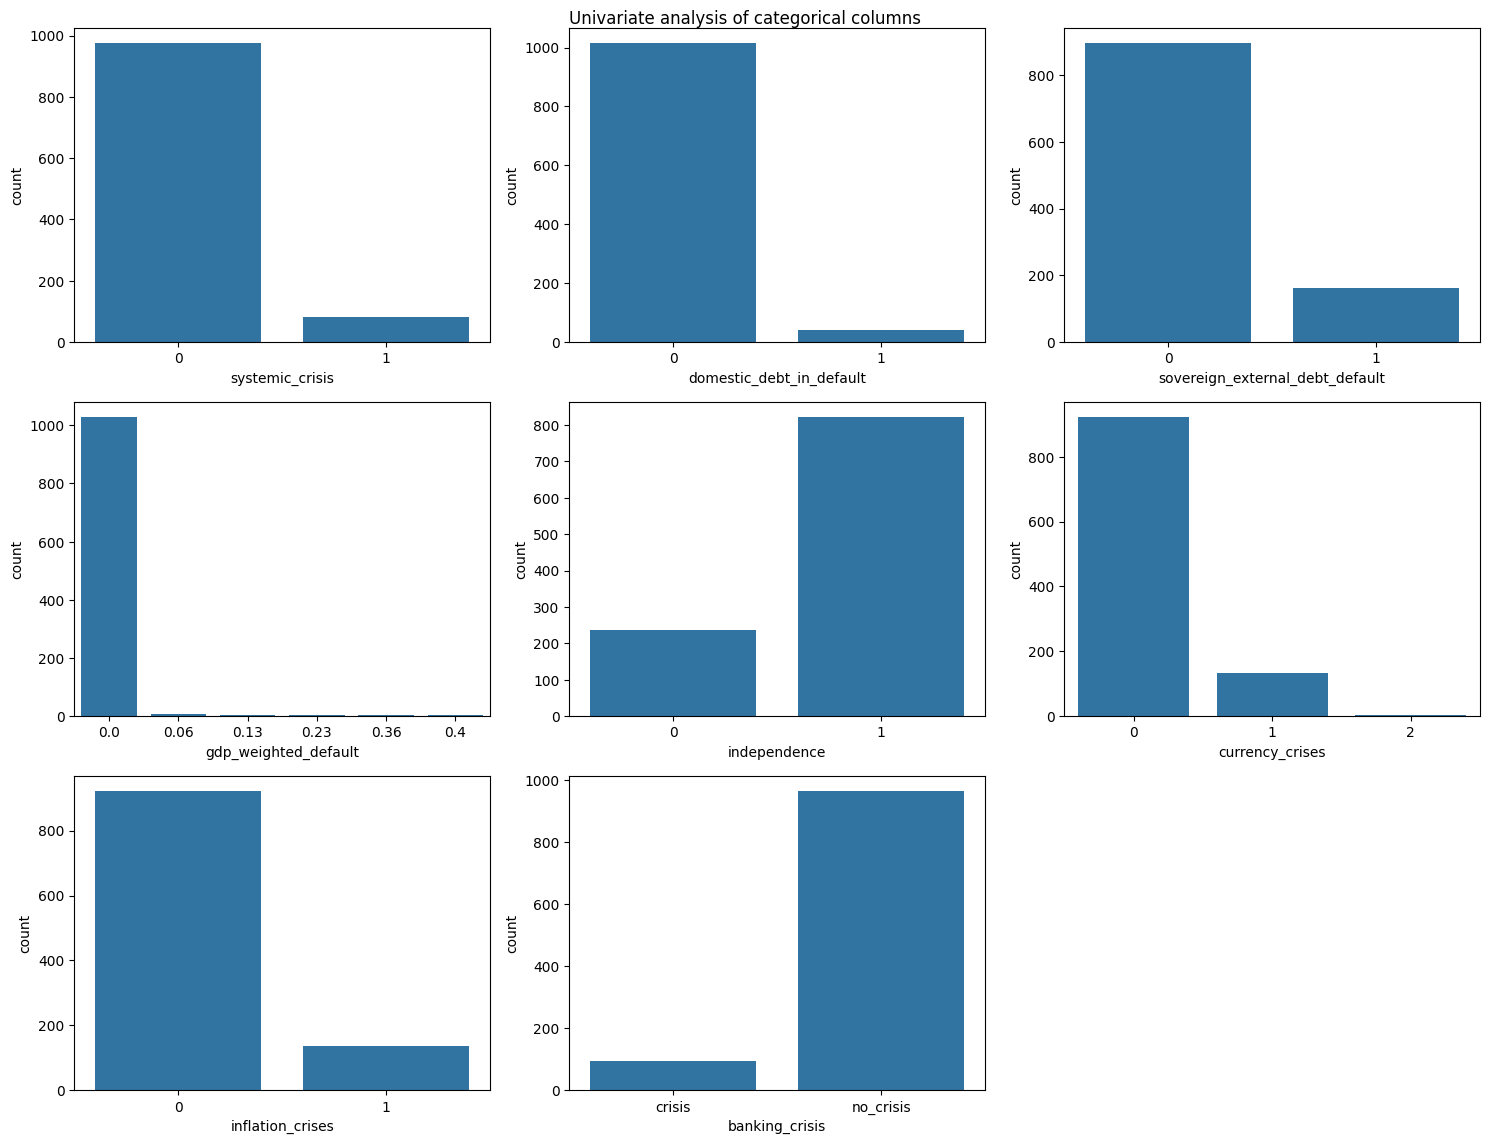

In [ ]:
numeric_features = df[numeric_features].select_dtypes(include=[int, float]).columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of categorical columns')

for i,col in enumerate(categorical_features):
  plt.subplot(4,3,i+1)
  sns.countplot(x=col,data=df)
  plt.xlabel(col)
  plt.tight_layout()

* The univariate analysis of categorical features reveals a significant imbalance in crisis-related features, where the '0' category (indicating no crisis) dominates over the '1' category (indicating a crisis). This pattern is particularly evident in systemic and inflation crises, suggesting that crises are relatively rare in the dataset.

In [ ]:
df_org = df.copy()

In [ ]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# ONE-HOT ENCODING
df__ = pd.get_dummies(df, columns=['cc3', 'country'], drop_first=True)
df__.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,cc3_CAF,cc3_CIV,cc3_DZA,cc3_EGY,cc3_KEN,cc3_MAR,cc3_MUS,cc3_NGA,cc3_TUN,cc3_ZAF,cc3_ZMB,cc3_ZWE,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df__.drop(['case'], axis=1, inplace=True)

In [ ]:
df__['banking_crisis'] = df__['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [ ]:
# lets extract the dependent and independent features
X = df__.drop(['banking_crisis'], axis=1)
y = df__['banking_crisis']

In [ ]:
Classes = ['no_crisis', 'crises']

In [ ]:
import random
random.seed(42)

In [ ]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [ ]:
# lets split the dataset 80:20
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.2)

Training shape: (847, 34)
Testing shape: (212, 34)


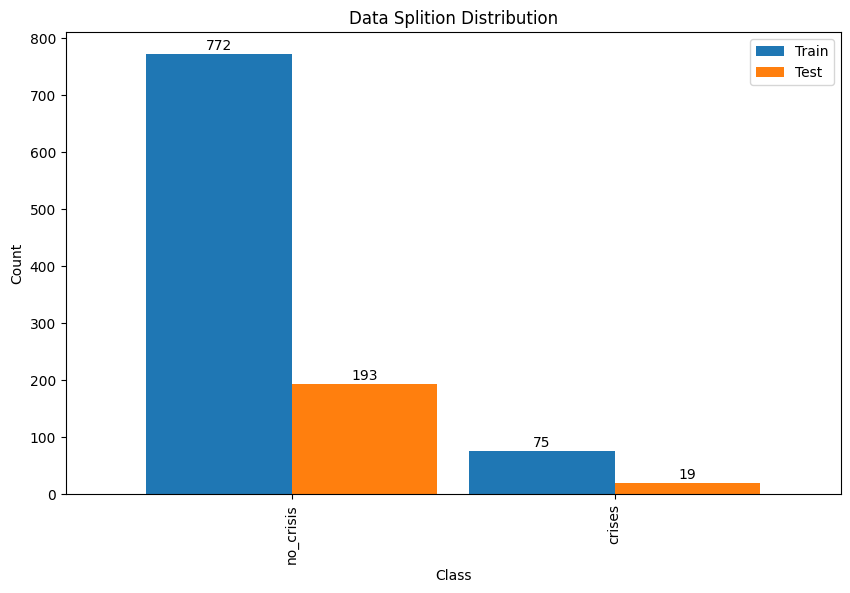

In [ ]:
# get the value counts
y_train_series = pd.Series(y_train).astype(int)
y_test_series = pd.Series(y_test).astype(int)

class_mapping = {index: class_name for index, class_name in enumerate(Classes)}

train_value_counts = y_train_series.map(class_mapping).value_counts()
test_value_counts = y_test_series.map(class_mapping).value_counts()

# Create a Pandas DataFrame
df = pd.DataFrame({'Train': train_value_counts, 'Test': test_value_counts})

fig, ax = plt.subplots(figsize=(10, 6))
ax = df.plot.bar(width=0.9, ax=ax)
for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=1)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Data Splition Distribution')

plt.savefig(f"{save_results}/train_test_val.png", bbox_inches='tight')
plt.show()

* The graph provides a visual representation of how the dataset is split into training and testing sets, with an 80:20 ratio. It shows the distribution of each class within both the training and testing datasets, allowing us to observe how the classes are represented after the split. The bar chart illustrates the count of samples for each class in both datasets, helping to ensure that the distribution of classes is consistent and balanced between the training and testing sets. This consistency is important for model training and evaluation to avoid biased results.

In [ ]:
df__[['year', 'exch_usd', 'inflation_annual_cpi']].describe()

,year,exch_usd,inflation_annual_cpi
count,1059.000000,1059.000000,1.059000e+03
mean,1967.767705,43.140831,2.084889e+04
std,33.530632,111.475380,6.757274e+05
min,1860.000000,0.000000,-2.850214e+01
25%,1951.000000,0.195350,2.086162e+00
50%,1973.000000,0.868400,5.762330e+00
75%,1994.000000,8.462750,1.164405e+01
max,2014.000000,744.306139,2.198970e+07


In [ ]:

'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['year', 'exch_usd', 'inflation_annual_cpi']] = scaler.fit_transform(X_train[['year', 'exch_usd', 'inflation_annual_cpi']])
X_test[['year', 'exch_usd', 'inflation_annual_cpi']] = scaler.transform(X_test[['year', 'exch_usd', 'inflation_annual_cpi']])

In [ ]:
X_train.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,cc3_CAF,cc3_CIV,cc3_DZA,cc3_EGY,cc3_KEN,cc3_MAR,cc3_MUS,cc3_NGA,cc3_TUN,cc3_ZAF,cc3_ZMB,cc3_ZWE,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
327,-1.908103,0,-0.384852,0,0,0.0,-0.034517,1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
193,0.594067,1,2.339508,0,1,0.0,-0.034518,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
490,0.951520,0,0.315577,0,1,0.0,-0.034500,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1001,-0.359141,0,-0.386646,0,0,0.0,-0.034507,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
153,1.130246,0,0.335629,0,0,0.0,-0.034496,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [ ]:
def results(model, X_train, y_pred, y_test, y_pred_train, y_train, classes, multi_class=False, show_cm=False, show_roc=False):
    if multi_class:
        accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train) * 100, 2)
        precision = round(precision_score(y_pred, y_test, average='macro') * 100, 2)
        recall = round(recall_score(y_pred, y_test, average='macro') * 100, 2)
        f1_scr = round(f1_score(y_pred, y_test, average='macro') * 100, 2)
    else:
        accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train) * 100, 2)
        precision = round(precision_score(y_pred, y_test) * 100, 2)
        recall = round(recall_score(y_pred, y_test) * 100, 2)
        f1_scr = round(f1_score(y_pred, y_test) * 100, 2)

    # Calculate AUC-ROC score
    auc_roc_score = round(roc_auc_score(y_test, y_pred)*100,2)

    # Calculate TP, TN, FP, FN
    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm.ravel()

    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print("AUC-ROC Score: {}%".format(auc_roc_score))
    print("True Positives:", tp)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print()

    if show_cm:
        print("Classification Report:")
        print(classification_report(y_pred, y_test, target_names=classes))
        print()
        print("Confusion Matrix:")
        fig, ax = plt.subplots(figsize=(7, 5))
        ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                                  ax=ax,
                                                  display_labels=classes,
                                                  xticks_rotation='vertical')
        plt.savefig(f"{save_results}/{model.__class__.__name__}_confusion_matrix.png", bbox_inches='tight')
        plt.show()

    if show_roc:
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig(f"{save_results}/{model.__class__.__name__}_auc_roc.png", bbox_inches='tight')
        plt.show()

    return {
        'Model': model.__class__.__name__,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr,
        'AUC-ROC Score': auc_roc_score,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    }


In [ ]:
import time

def train_model(model, X_train, y_train, X_test, y_test, labelEncoder, multi_class=None, show_cm=False, show_roc=False):
    # Record the start time
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Record the end time for training
    end_time_training = time.time()

    # Compute the training time in seconds
    training_time = end_time_training - start_time
    print(f"Training time: {training_time:.3f} seconds")

    # predict the model on testing data
    start_time_testing = time.time()
    y_pred = model.predict(X_test)
    end_time_testing = time.time()

    # Compute the testing time in seconds
    testing_time = end_time_testing - start_time_testing
    print(f"Testing time: {testing_time:.3f} seconds")

    # Predict the model on training data
    y_pred_train = model.predict(X_train)

    # Get results
    RESULTS_LR = results(model, X_train, y_pred, y_test, y_pred_train, y_train, labelEncoder, multi_class, show_cm, show_roc)

    # Add the training and testing times to RESULTS_LR
    RESULTS_LR['Training time (s)'] = training_time
    RESULTS_LR['Testing time (s)'] = testing_time

    return RESULTS_LR, model

In [ ]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

In [ ]:
# SVM
model = SVC(class_weight='balanced')

Training time: 0.066 seconds
Testing time: 0.010 seconds

Training Accuracy: 95.99%
Testing Accuracy: 95.75%
Precision: 100.0%
Recall: 67.86%
F1-Score: 80.85%
AUC-ROC Score: 97.67%
True Positives: 184
True Negatives: 19
False Positives: 0
False Negatives: 9

Classification Report:
              precision    recall  f1-score   support

   no_crisis       0.95      1.00      0.98       184
      crises       1.00      0.68      0.81        28

    accuracy                           0.96       212
   macro avg       0.98      0.84      0.89       212
weighted avg       0.96      0.96      0.95       212


Confusion Matrix:


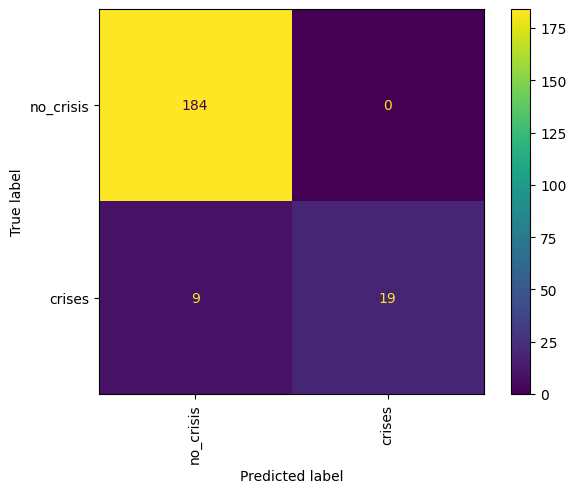

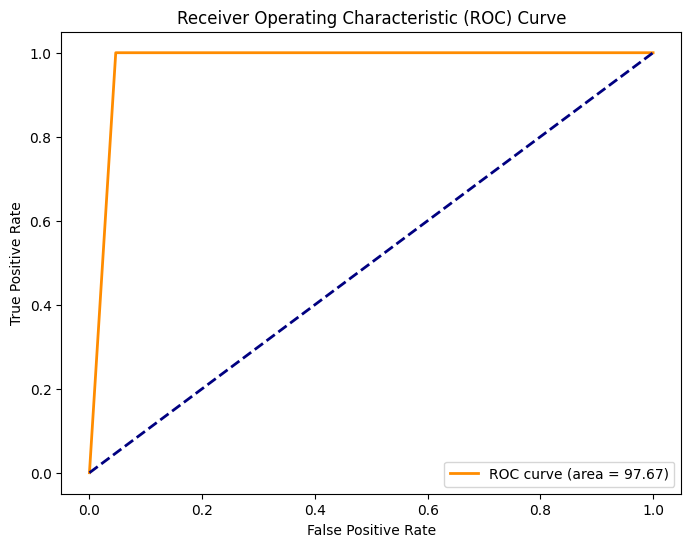

In [ ]:
res, dt = train_model(model,X_train,y_train,X_test,y_test,  Classes, multi_class=False, show_cm=True, show_roc=True)
df_results_dt = get_model_results(res)

* The results and corresponding graphs indicate that the model performs very well, with high accuracy (95.99% training, 95.75% testing) and perfect precision (100%). However, the recall is lower at 67.86%, suggesting the model misses some positive cases. The F1-Score of 80.85% reflects the balance between precision and recall. The AUC-ROC score of 97.67% shows excellent ability to distinguish between classes. The confusion matrix reveals 184 true positives, 19 true negatives, 0 false positives, and 9 false negatives. The AUC-ROC curve, given the high score, confirms strong classification performance.

In [ ]:
df_all_models = df_results_dt.sort_values(by='AUC-ROC Score', ascending=False)
final_res = df_all_models.reset_index()
print(tabulate(final_res, headers = 'keys', tablefmt = 'psql'))

+----+---------+---------------------+--------------------+-------------+----------+-------+-----------------+------------------+------------------+-------------------+-------------------+---------------------+--------------------+
|    | Model   |   Training Accuracy |   Testing Accuracy |   Precision |   Recall |    F1 |   AUC-ROC Score |   True Positives |   True Negatives |   False Positives |   False Negatives |   Training time (s) |   Testing time (s) |
|----+---------+---------------------+--------------------+-------------+----------+-------+-----------------+------------------+------------------+-------------------+-------------------+---------------------+--------------------|
|  0 | SVC     |               95.99 |              95.75 |         100 |    67.86 | 80.85 |           97.67 |              184 |               19 |                 0 |                 9 |           0.0663505 |          0.0102849 |
+----+---------+---------------------+--------------------+-------------

# <font color='magma' size=7> **Priciple Component Analysis (PCA**)
___________
* Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of correlated variables into a smaller set of uncorrelated variables called principal components. By capturing the most variance in the data with fewer components, PCA simplifies the dataset while retaining its essential information, making it particularly useful for visualization and noise reduction in machine learning tasks.

In [ ]:
X.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,cc3_CAF,cc3_CIV,cc3_DZA,cc3_EGY,cc3_KEN,cc3_MAR,cc3_MUS,cc3_NGA,cc3_TUN,cc3_ZAF,cc3_ZMB,cc3_ZWE,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.shape

(1059, 34)

In [ ]:
X_std = X.copy()
X_std[['year', 'exch_usd', 'inflation_annual_cpi']] = scaler.transform(X_std[['year', 'exch_usd', 'inflation_annual_cpi']])

In [ ]:
X_std.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,cc3_CAF,cc3_CIV,cc3_DZA,cc3_EGY,cc3_KEN,cc3_MAR,cc3_MUS,cc3_NGA,cc3_TUN,cc3_ZAF,cc3_ZMB,cc3_ZWE,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
0,-2.920886,1,-0.386176,0,0,0.0,-0.034509,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,-2.891099,0,-0.386171,0,0,0.0,-0.034494,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-2.861311,0,-0.386176,0,0,0.0,-0.034518,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-2.831523,0,-0.386181,0,0,0.0,-0.034498,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,-2.801735,0,-0.386185,0,0,0.0,-0.034518,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_std.shape

(1059, 34)

In [ ]:
from sklearn.decomposition import PCA

# Dimensionaly Reduction
pca = PCA()
X_pca_reduced = pca.fit_transform(X_std)

In [ ]:
def plot_cumm_var(pca, dataset_name, threshold=None):
    pc_list = ["PC"+str(i) for i in list(range(1, len(pca.explained_variance_ratio_.tolist())+1))]
    pca_variance = np.cumsum(pca.explained_variance_ratio_.tolist())
    pca_df = pd.DataFrame({'pca_feature':pc_list,'cummulative variance':pca_variance})
    pca_df = pca_df[pca_df['cummulative variance']<=threshold]
    pca_df['cummulative variance'] = round(pca_df['cummulative variance']*100,2)
    plt.figure(figsize=(15,5))
    plt.plot(pc_list,pca_variance,c='red',marker='X', linewidth=2,markersize=9)
    if threshold:
        # Draw line set threshold
        value99 = pca_variance[-1]*threshold
        plt.hlines(y = value99, xmin=0, xmax=len(pca.explained_variance_ratio_.tolist()), color = 'r', linestyles = 'dashed')
    plt.title(f"PCA Variance Graph ({dataset_name} Dataset) - Total Best Feature {len(pca_df)}", fontsize=18)
    plt.xlabel("PCs",fontsize=18)
    plt.ylabel("Cummulative Variance",fontsize=18)
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.savefig(f"{save_results}/PCA.png", bbox_inches='tight')
    plt.show()
    print("Final Total Feature We will use for PCA is {}".format(len(pca_df)))
    return len(pca_df)

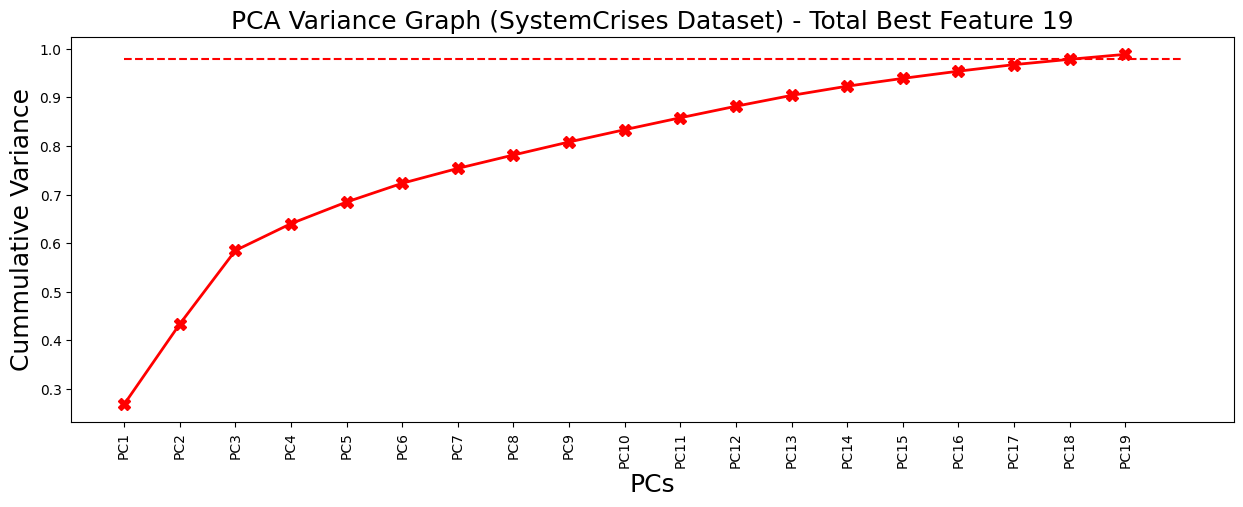

Final Total Feature We will use for PCA is 19


In [ ]:
# lets Draw a horizontal line on the above plot to highlight the threshold of 99%.
total_best_pca = plot_cumm_var(pca, 'SystemCrises', threshold=0.99)

In [ ]:
total_best_pca

19

In [ ]:
pca = PCA(n_components=total_best_pca)
# pass our X to the pca and store the reduced vectors into data_pca
data_pca = pca.fit_transform(X_std)

In [ ]:
data_pca.shape

(1059, 19)

In [ ]:
# lets split the dataset 80:20
X_train, X_test, y_train, y_test = splitting_dataset(data_pca, y , test_size=0.2)

Training shape: (847, 19)
Testing shape: (212, 19)


Training time: 0.062 seconds
Testing time: 0.018 seconds

Training Accuracy: 95.87%
Testing Accuracy: 95.28%
Precision: 100.0%
Recall: 65.52%
F1-Score: 79.17%
AUC-ROC Score: 97.41%
True Positives: 183
True Negatives: 19
False Positives: 0
False Negatives: 10

Classification Report:
              precision    recall  f1-score   support

   no_crisis       0.95      1.00      0.97       183
      crises       1.00      0.66      0.79        29

    accuracy                           0.95       212
   macro avg       0.97      0.83      0.88       212
weighted avg       0.96      0.95      0.95       212


Confusion Matrix:


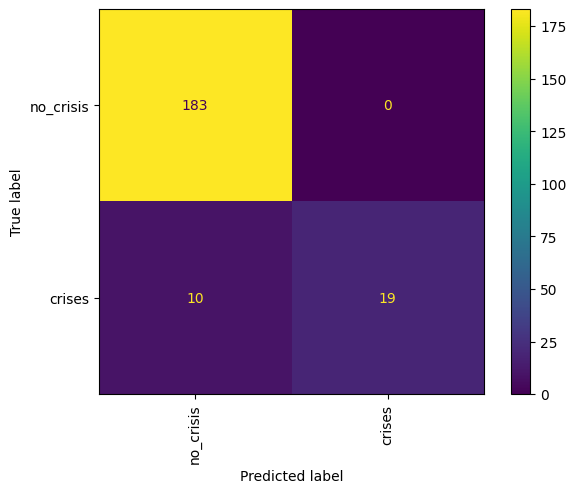

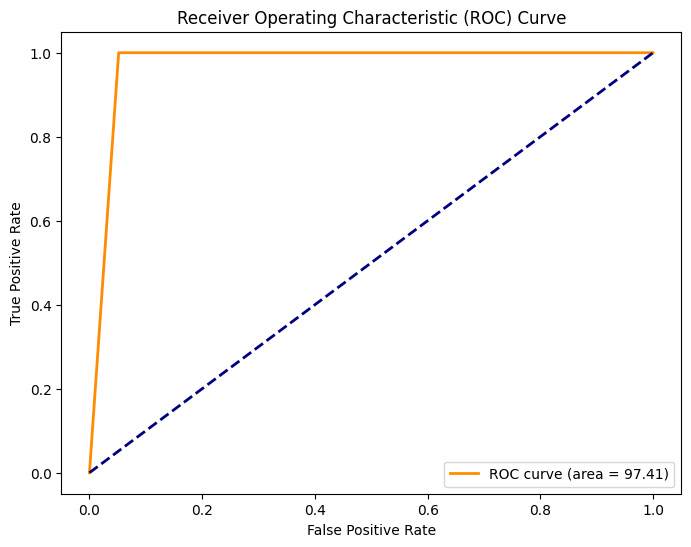

In [ ]:
res, dt = train_model(model,X_train,y_train,X_test,y_test,  Classes, multi_class=False, show_cm=True, show_roc=True)
df_results_pca = get_model_results(res)

* The results and corresponding graphs show that the model performs very well overall. The training accuracy is 95.87%, and the testing accuracy is 95.28%, indicating robust performance. The precision is perfect at 100%, meaning all predicted positive cases are true positives. However, the recall is lower at 65.52%, suggesting that some positive cases are missed. The F1-Score of 79.17% balances precision and recall. The AUC-ROC score of 97.41% highlights excellent classification ability. The confusion matrix shows 183 true positives, 19 true negatives, 0 false positives, and 10 false negatives. The AUC-ROC curve reinforces the model's strong performance in distinguishing between classes.

In [ ]:
df_all_models = df_results_pca.sort_values(by='AUC-ROC Score', ascending=False)
final_res_pca = df_all_models.reset_index()
print(tabulate(final_res_pca, headers = 'keys', tablefmt = 'psql'))

+----+---------+---------------------+--------------------+-------------+----------+-------+-----------------+------------------+------------------+-------------------+-------------------+---------------------+--------------------+
|    | Model   |   Training Accuracy |   Testing Accuracy |   Precision |   Recall |    F1 |   AUC-ROC Score |   True Positives |   True Negatives |   False Positives |   False Negatives |   Training time (s) |   Testing time (s) |
|----+---------+---------------------+--------------------+-------------+----------+-------+-----------------+------------------+------------------+-------------------+-------------------+---------------------+--------------------|
|  0 | SVC     |               95.87 |              95.28 |         100 |    65.52 | 79.17 |           97.41 |              183 |               19 |                 0 |                10 |            0.061579 |          0.0175359 |
+----+---------+---------------------+--------------------+-------------

# <font color='magma' size=7>**Models Evaluation**
_________

In [ ]:
final_res_pca['Features'] = "PCA"
final_res['Features'] = "All Features"

In [ ]:
FINAL_RES = pd.concat([final_res, final_res_pca]).reset_index(drop=True)
FINAL_RES = FINAL_RES[['Features']+FINAL_RES.columns[:-1].tolist()]
FINAL_RES

,Features,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1,AUC-ROC Score,True Positives,True Negatives,False Positives,False Negatives,Training time (s),Testing time (s)
0,All Features,SVC,95.99,95.75,100.0,67.86,80.85,97.67,184,19,0,9,0.066350,0.010285
1,PCA,SVC,95.87,95.28,100.0,65.52,79.17,97.41,183,19,0,10,0.061579,0.017536


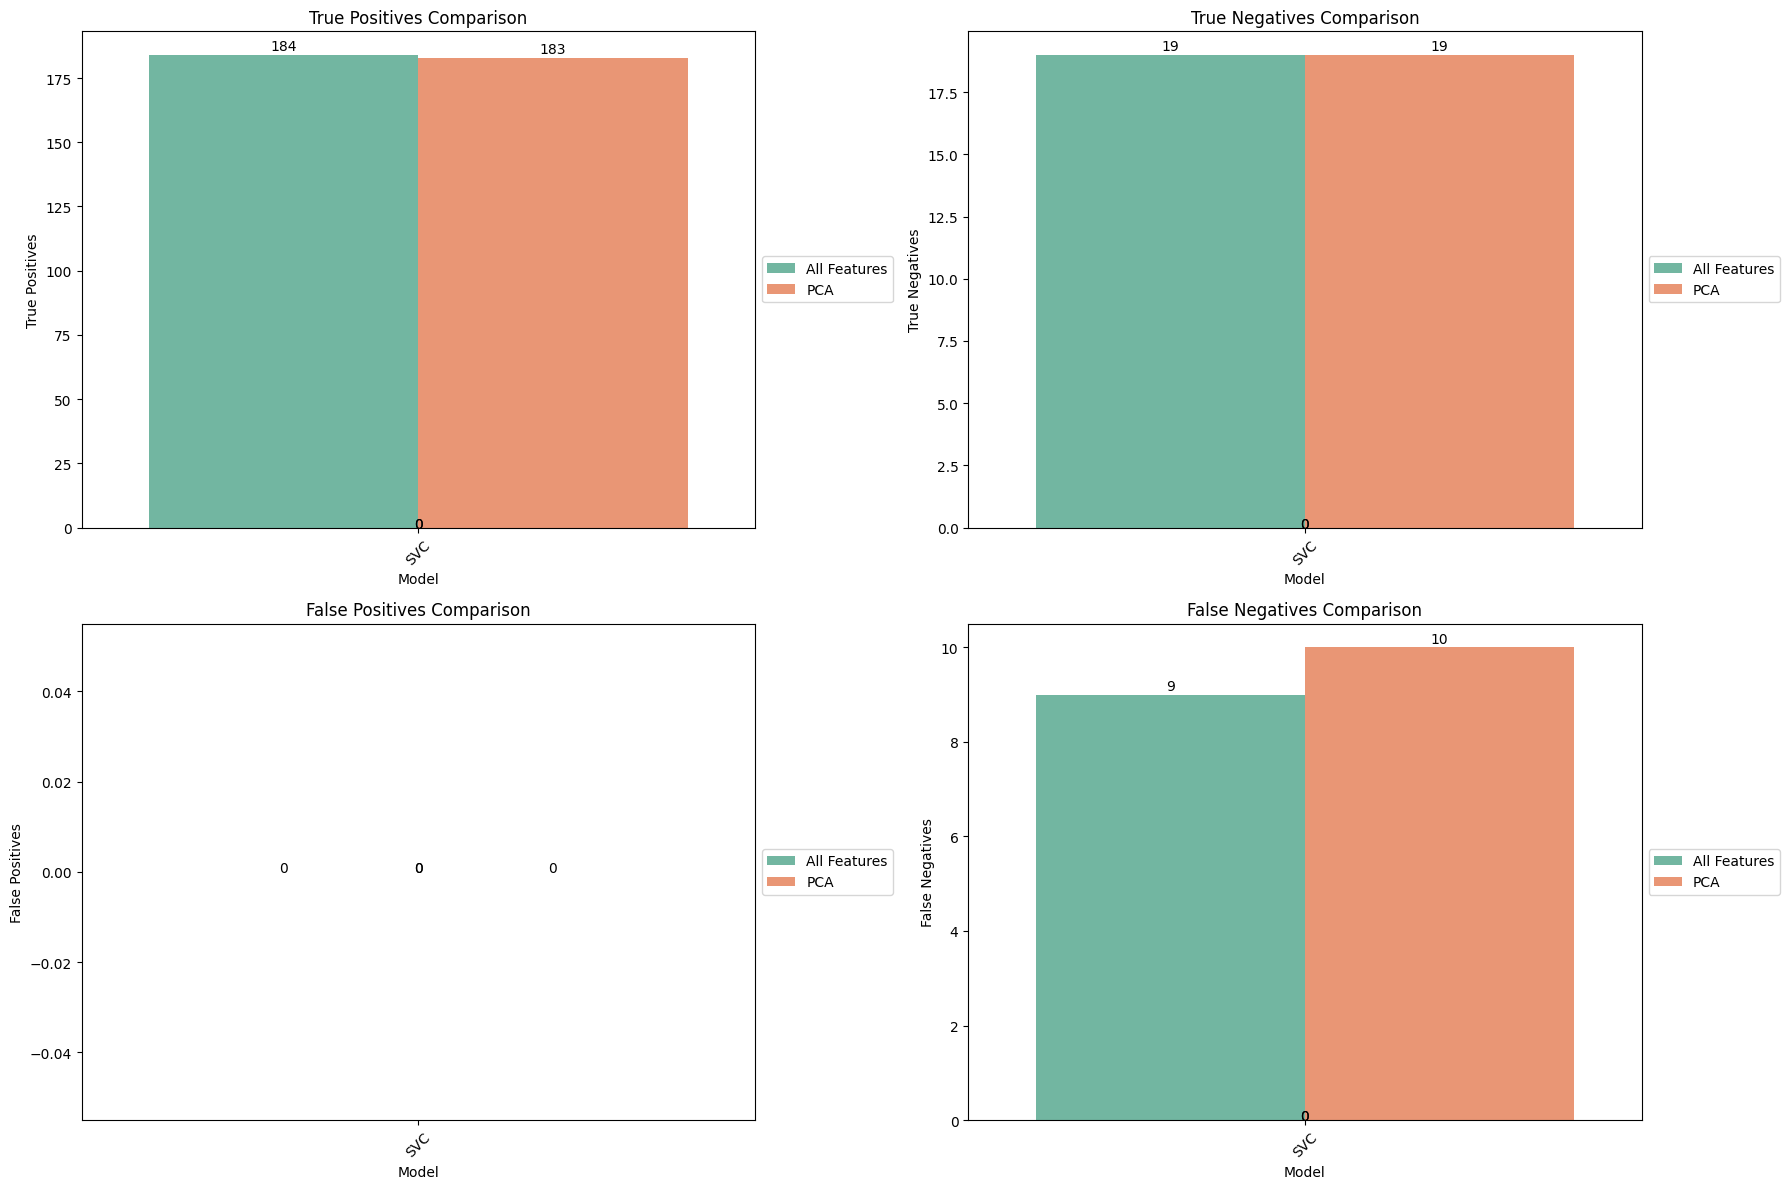

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

metrics = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
titles = ['True Positives Comparison', 'True Negatives Comparison', 'False Positives Comparison', 'False Negatives Comparison']

for i, ax in enumerate(axes.flatten()):
    # Plot the barplot for each metric
    sns.barplot(data=FINAL_RES, x='Model', y=metrics[i], hue='Features', estimator=sum, ci=None, palette='Set2', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Model')
    ax.set_ylabel(metrics[i])
    ax.tick_params(axis='x', rotation=45)

    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01 * height, f"{int(height)}", ha='center')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(f"{save_results}/TP_TN_FP_FN.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

* **Model with All Features:** Achieves a slightly higher training accuracy (95.99%) and testing accuracy (95.75%) compared to the PCA model. It has perfect precision (100%) and slightly higher recall (67.86%), resulting in a higher F1-Score (80.85%). The AUC-ROC Score is also better (97.67%). This model is faster in training (0.066 s) and testing (0.010 s).

* **Model with PCA:** Shows a marginally lower training accuracy (95.87%) and testing accuracy (95.28%) than the all-features model. Precision remains perfect (100%), but recall is slightly lower (65.52%), leading to a lower F1-Score (79.17%). The AUC-ROC Score is slightly lower (97.41%). This model is marginally faster in testing (0.017 s) but slower in training (0.062 s).

**Overall, the model using all features performs slightly better in accuracy, recall, and F1-Score, while the PCA model is marginally faster in testing.**